<a href="https://colab.research.google.com/github/PankajRaghunadhabhatla/Python/blob/main/Insurance_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance = pd.read_csv('new_insurance_data.csv')
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [3]:
# IF bmi is between 18.5- 24.9 > healthy range

In [4]:
#IF target column is containing Continuous data - Regression, Decision tree regressor, Random forest Regression
# If categorical regression, Decision Tree Classifier, Random Forest Classifier, SVM Classifier

In [5]:
#import library
#import dataset
# EDA - Exploratory dataset Analysis ---> To Understand Data
# Data Cleaning
# Data Preprocessing
# Build Model

In [6]:
insurance.shape

(1338, 13)

In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [8]:
insurance.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [9]:
insurance.columns # Extract column names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [10]:
col = list(insurance.columns)

In [11]:
type(col)

list

In [12]:
display(insurance.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,1329.0,3.931001e+01,1.403482e+01,1.800000e+01,2.700000e+01,3.900000e+01,5.100000e+01,6.400000e+01
bmi,1335.0,3.066511e+01,6.101690e+00,1.596000e+01,2.630250e+01,3.040000e+01,3.468750e+01,5.313000e+01
children,1333.0,1.090773e+00,1.201856e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
Claim_Amount,1324.0,3.336133e+04,1.561729e+04,1.920136e+03,2.076886e+04,3.370031e+04,4.505233e+04,7.727799e+04
past_consultations,1332.0,1.521622e+01,7.467723e+00,1.000000e+00,9.000000e+00,1.500000e+01,2.000000e+01,4.000000e+01
num_of_steps,1335.0,9.100047e+05,9.188612e+04,6.954300e+05,8.471995e+05,9.143000e+05,9.716840e+05,1.107872e+06
Hospital_expenditure,1334.0,1.584179e+07,2.669305e+07,2.945253e+04,4.077633e+06,7.490337e+06,1.084082e+07,2.616317e+08
NUmber_of_past_hospitalizations,1336.0,1.060629e+00,5.335831e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
Anual_Salary,1332.0,3.696849e+08,5.668843e+08,2.747072e+06,7.701932e+07,1.419361e+08,3.243499e+08,4.117197e+09
charges,1338.0,1.327042e+04,1.211001e+04,1.121874e+03,4.740287e+03,9.382033e+03,1.663991e+04,6.377043e+04


In [13]:
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [14]:
#Replace null values with mean and median
for i in col:
  if insurance[i].dtypes=='object':
    insurance[i]= insurance[i].fillna(insurance[i].mode()[0])
  else:
    insurance[i]= insurance[i].fillna(insurance[i].mean())

In [15]:
insurance.isnull().sum() # All the Null values are treated

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [16]:
insurance['smoker'].mode()

0    no
Name: smoker, dtype: object

In [17]:
insurance['smoker'].mode()[0]

'no'

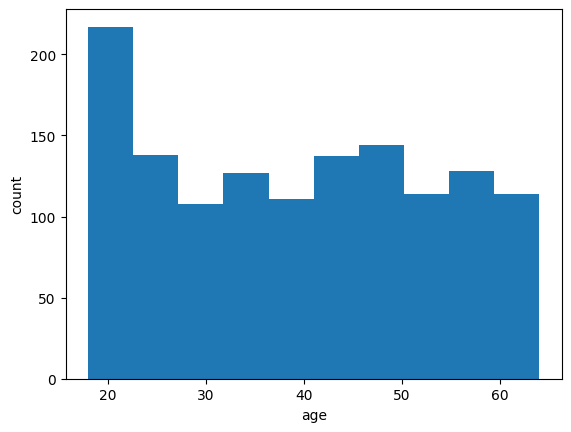

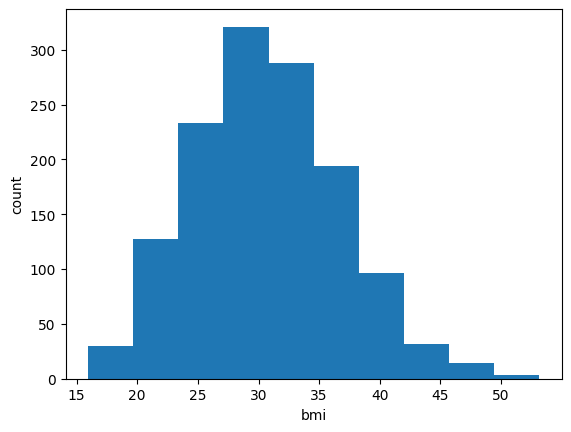

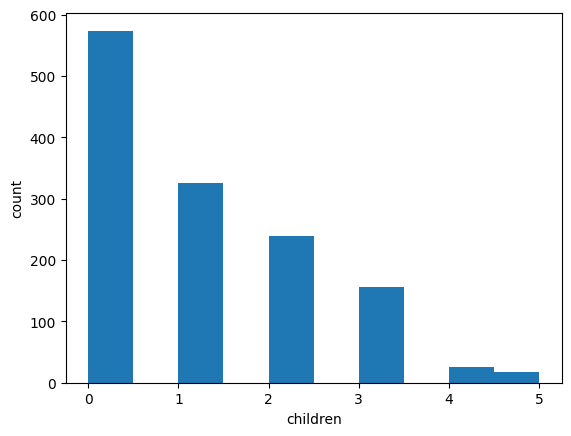

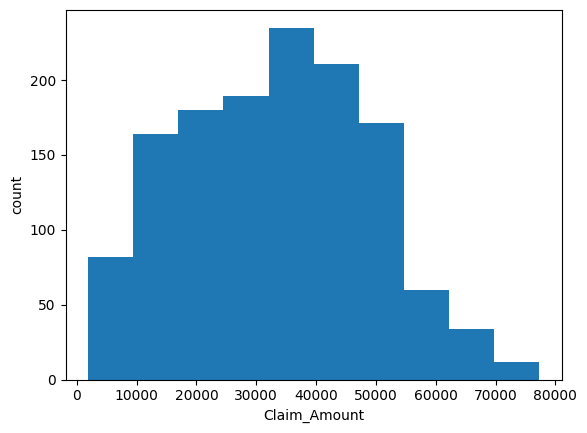

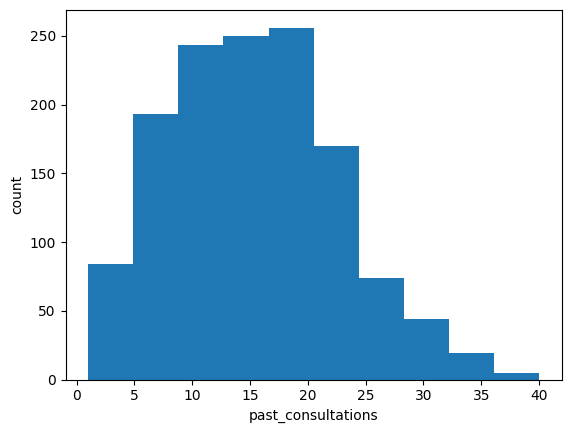

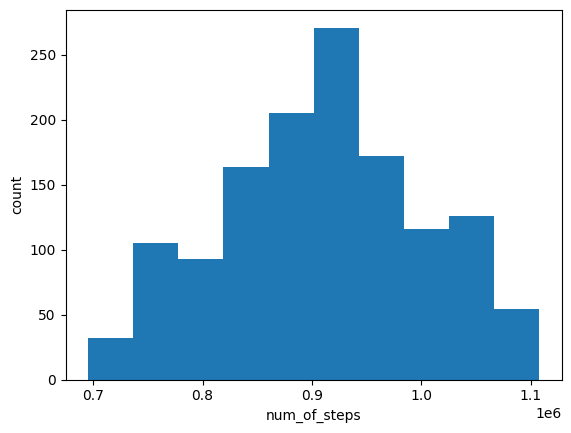

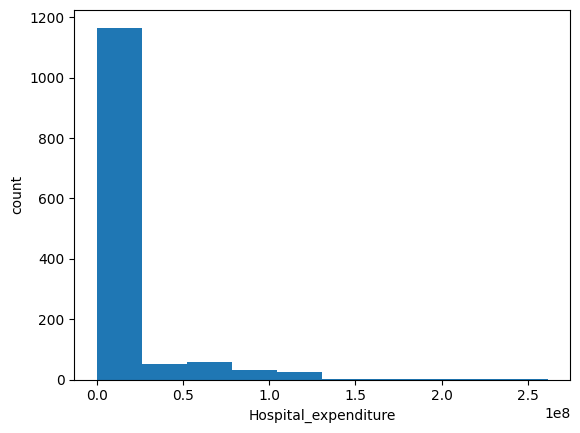

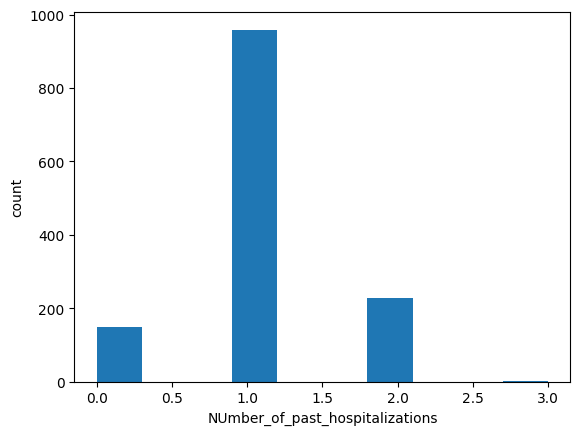

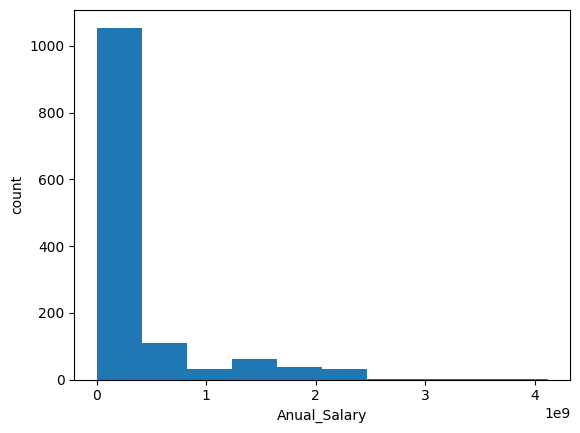

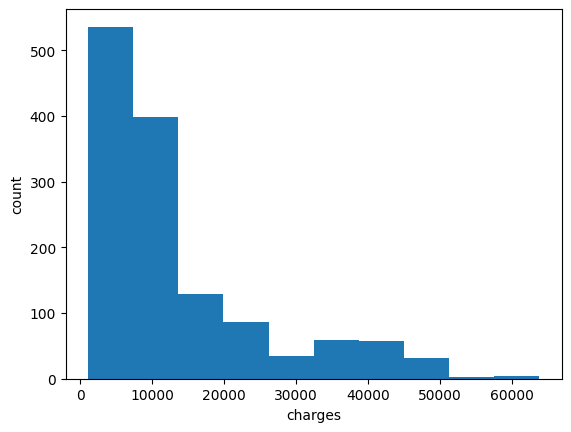

In [18]:
#I want to check the distribution of data
for col_name in col:
  if (insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
    plt.hist(insurance[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

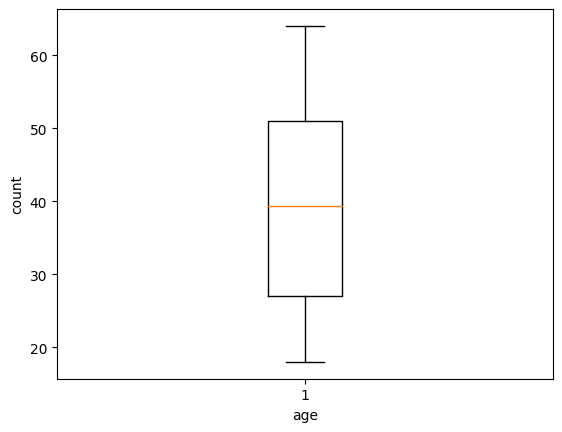

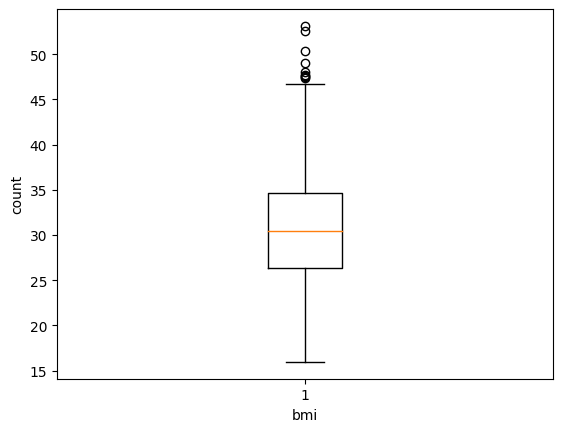

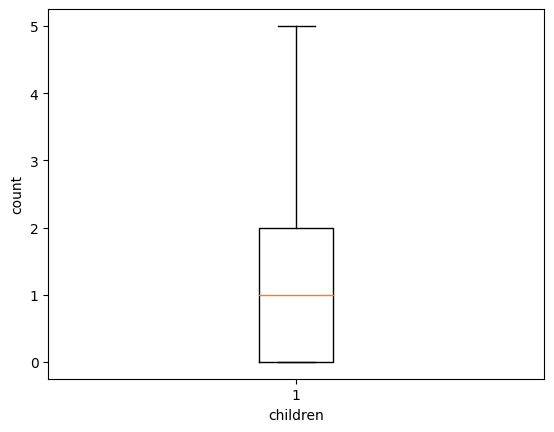

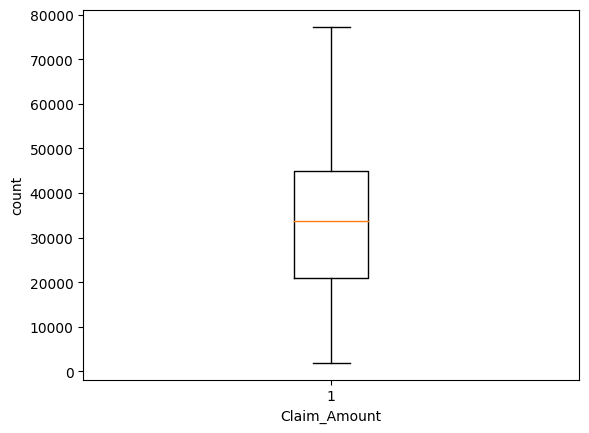

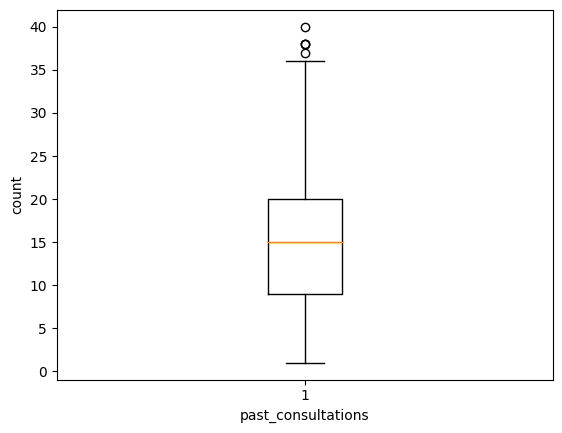

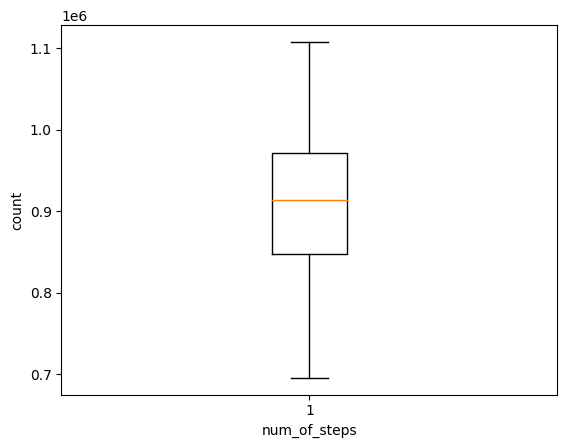

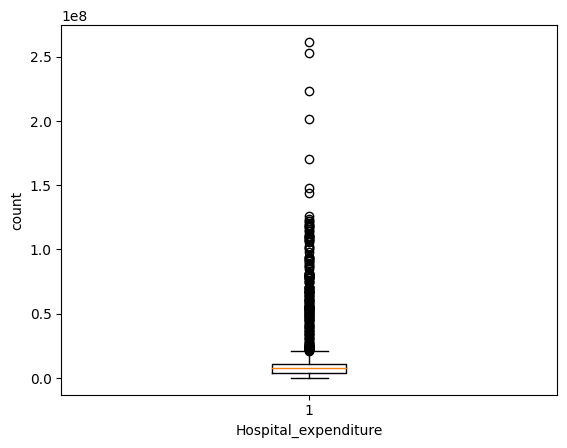

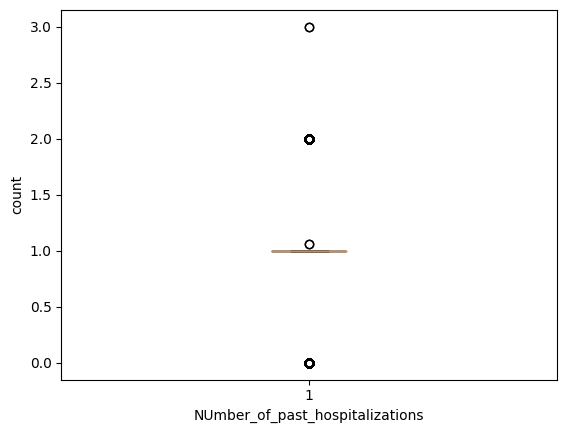

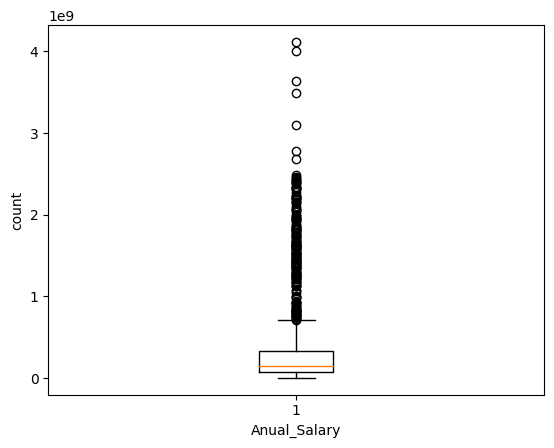

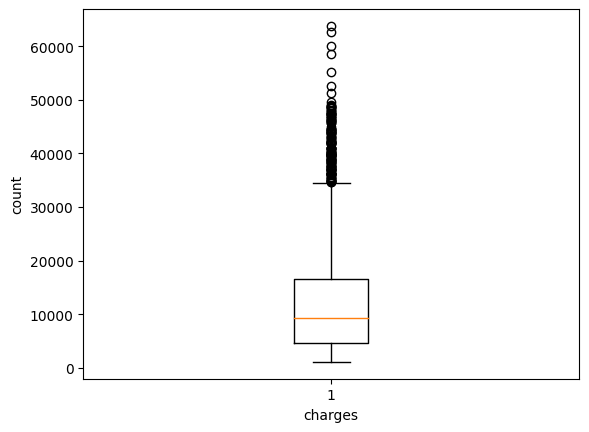

In [19]:
#I want to figure out if there are outliers present in the data
for col_name in col:
  if(insurance[col_name].dtypes=='int64' or insurance[col_name].dtypes=='float64'):
    plt.boxplot(insurance[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

In [20]:
# Treat Outliers
Q1 = insurance.bmi.quantile(0.25)
Q3 = insurance.bmi.quantile(0.75)
print("Q1",Q1)
print("Q3",Q3)

Q1 26.315
Q3 34.65625


In [21]:
IQR = Q3-Q1
IQR

8.341249999999999

In [22]:
#LOWER LIMIT
LL = Q1-1.5*IQR
# UPPER LIMIT
UL = Q3 + 1.5*IQR

print("LL", LL)
print("UL", UL)

LL 13.803125000000003
UL 47.168124999999996


In [23]:
insurance = insurance[(insurance.bmi >= Q1-1.5*IQR) & (insurance.bmi <= Q3 + 1.5*IQR)]

Q1 = insurance.past_consultations.quantile(0.25)
Q3 = insurance.past_consultations.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.past_consultations >= Q1 -1.5*IQR) & (insurance.past_consultations <= Q1 +1.5*IQR)]

Q1 = insurance.Hospital_expenditure.quantile(0.25)
Q3 = insurance.Hospital_expenditure.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.Hospital_expenditure >= Q1 -1.5*IQR) & (insurance.Hospital_expenditure <= Q1 +1.5*IQR)]

Q1 = insurance.Anual_Salary.quantile(0.25)
Q3 = insurance.Anual_Salary.quantile(0.75)
IQR = Q3 - Q1
insurance = insurance[(insurance.Anual_Salary >= Q1 -1.5*IQR) & (insurance.Anual_Salary <= Q1 +1.5*IQR)]


In [24]:
# for col_name in col:
#   if(insurance[col_name].dtypes == 'int64' or insurance[col_name].dtypes == 'float64'):
#     Q1 = insurance[col_name].quantile(0.25)
#     Q3 = insurance[col_name].quantile(0.75)
#     IQR = Q3-Q1
#     insurance[(insurance.col_name) >= Q1-1.5*IQR) & (insurance.col_name <= Q1 + 1.5*IQR)]

In [25]:
insurance.shape

(917, 13)

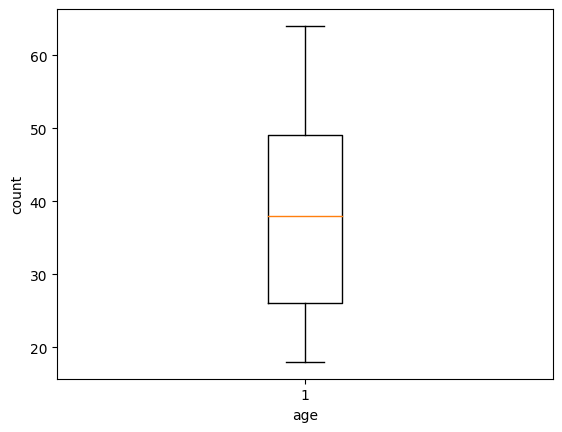

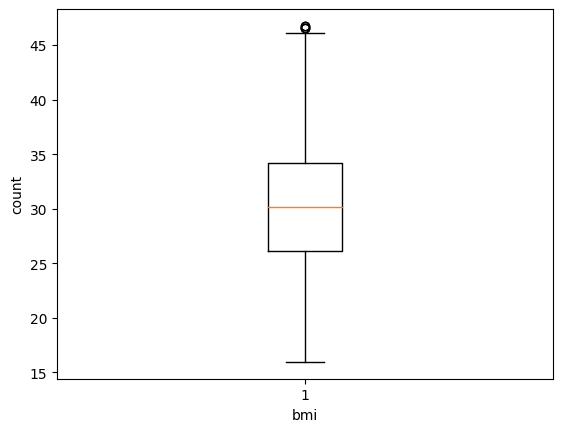

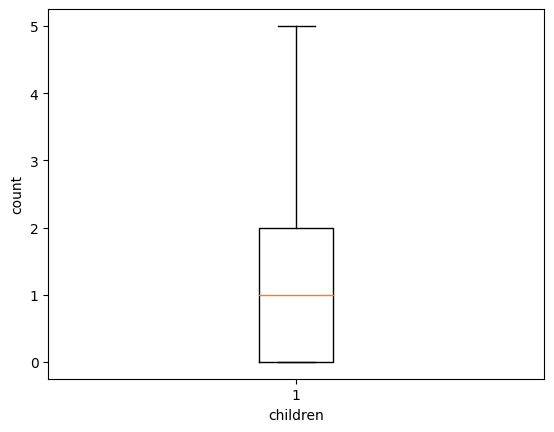

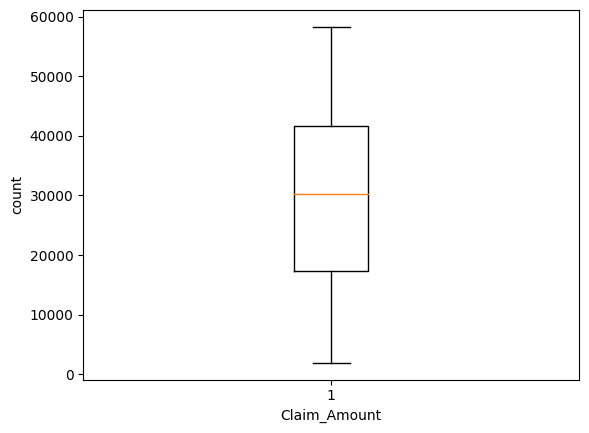

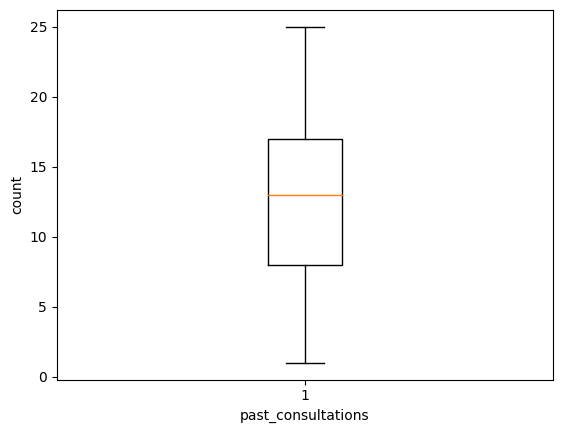

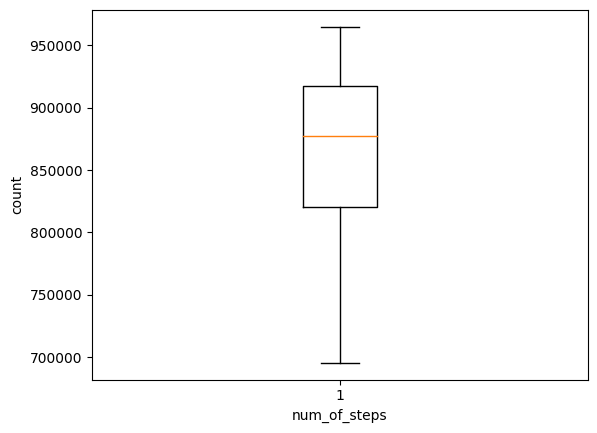

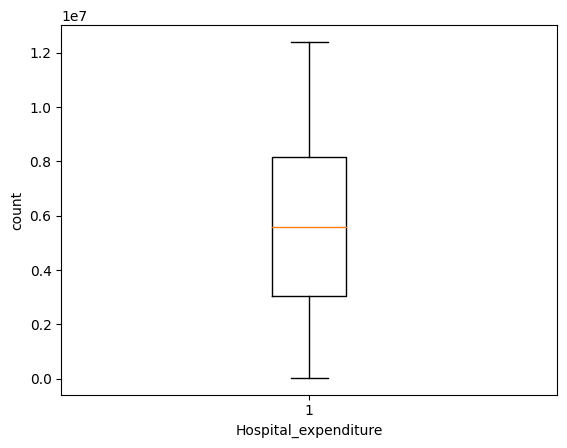

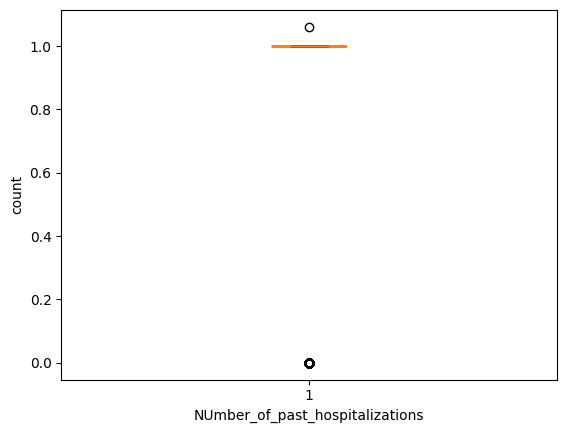

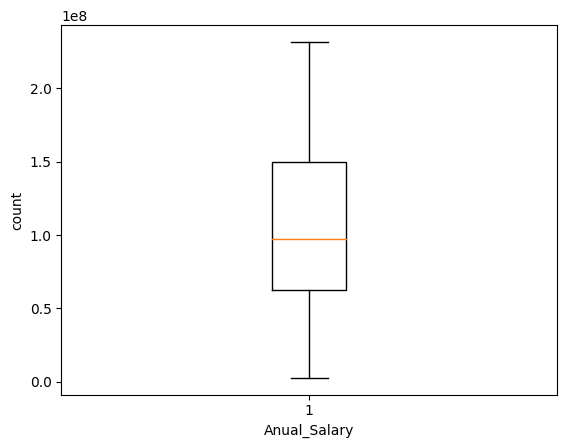

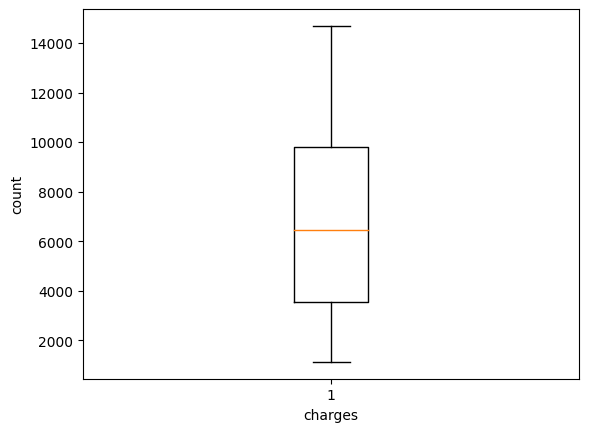

In [26]:
for col_name in col:
  if (insurance[col_name].dtypes == 'int64' or insurance[col_name].dtypes== 'float64'):
    plt.boxplot(insurance[col_name])
    plt.xlabel(col_name)
    plt.ylabel('count')
    plt.show()

In [ ]:
# Feature Selection -  To see which columns to pass model and which one to drop
# VIF - Variance Inflation factor
# Works with multi colinearity
# Relation between multiple corelation between variables

In [28]:
# Independent variable
# dependent variable

In [29]:
# VIF = 1, Variables are not related
# VIF (1-6), Variables are moderately acceptable, acceptable
# VIF >6, Variables are highly correlated ( Drop those columns)
# x - independed column
# y - dependent column (Target Variable)
# multi colinearity is 5 or 6
# age, gender, dob, ... charges

In [30]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in insurance.columns:
  if ((insurance[col].dtype != 'object') & (col != 'charges')): # only  num columns except for charges
    col_list.append(col)

In [34]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [35]:
X = insurance[col_list]
X

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
0,18.0,23.210,0.0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07
1,18.0,30.140,0.0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07
2,18.0,33.330,0.0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07
3,18.0,33.660,0.0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07
4,18.0,34.100,0.0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07
...,...,...,...,...,...,...,...,...,...
952,61.0,32.300,2.0,12016.80748,20.0,956170.0,5.078821e+06,1.0,2.120264e+08
953,18.0,38.280,0.0,29441.40783,19.0,960921.0,1.100894e+07,1.0,2.192346e+08
961,63.0,21.660,1.0,32307.55421,17.0,948758.0,7.184029e+06,1.0,2.176866e+08
968,23.0,23.180,2.0,46542.86192,18.0,957638.0,1.178029e+07,1.0,2.264021e+08


In [36]:
X.columns

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary'],
      dtype='object')

In [37]:
# To get only values, write X.values to extract only values and not column names
X.values

array([[1.80000000e+01, 2.32100000e+01, 0.00000000e+00, ...,
        4.72092099e+06, 0.00000000e+00, 5.57849700e+07],
       [1.80000000e+01, 3.01400000e+01, 0.00000000e+00, ...,
        4.32983168e+06, 0.00000000e+00, 1.37008852e+07],
       [1.80000000e+01, 3.33300000e+01, 0.00000000e+00, ...,
        6.88486077e+06, 0.00000000e+00, 7.35231073e+07],
       ...,
       [6.30000000e+01, 2.16600000e+01, 1.00000000e+00, ...,
        7.18402893e+06, 1.00000000e+00, 2.17686612e+08],
       [2.30000000e+01, 2.31800000e+01, 2.00000000e+00, ...,
        1.17802904e+07, 1.00000000e+00, 2.26402084e+08],
       [6.40000000e+01, 3.29650000e+01, 0.00000000e+00, ...,
        6.17124013e+06, 1.00000000e+00, 2.29902851e+08]])

In [42]:
for i in range(len(X.columns)):
  print(i)

0
1
2
3
4
5
6
7
8


In [43]:
# To get VIF, we only need to pass values
vif_data = pd.DataFrame()#create empty data frame
vif_data
vif_data["features"] = X.columns # WE will have a column by name features and all the columns will be added here
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                          features        VIF
0                              age  30.137230
1                              bmi  26.767895
2                         children   2.142782
3                     Claim_Amount   5.493362
4               past_consultations   6.011188
5                     num_of_steps  62.030139
6             Hospital_expenditure   4.731785
7  NUmber_of_past_hospitalizations  11.357691
8                     Anual_Salary  10.813571


In [44]:
# First we will remove num_of steps column with highest VIF and one by one we will remove and check VIF again
insurance = insurance.drop(['num_of_steps'], axis=1)

In [45]:
# We will check the VIF again and see:
col_list = []
for col in insurance.columns:
  if ((insurance[col].dtype != 'object') & (col != 'charges')):
    col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                          features        VIF
0                              age  26.787151
1                              bmi  12.156676
2                         children   2.110979
3                     Claim_Amount   5.211056
4               past_consultations   5.607546
5             Hospital_expenditure   4.524130
6  NUmber_of_past_hospitalizations  10.639255
7                     Anual_Salary  10.790843


In [46]:
insurance = insurance.drop(['age'], axis=1)

In [47]:
# we will run VIF again
col_list = []
for col in insurance.columns:
  if ((insurance[col].dtype != 'object') & (col != 'charges')):
    col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                          features        VIF
0                              bmi  10.983781
1                         children   2.024288
2                     Claim_Amount   5.125063
3               past_consultations   5.555205
4             Hospital_expenditure   4.489896
5  NUmber_of_past_hospitalizations   8.248242
6                     Anual_Salary   5.971676


In [48]:
#we will remove bmi column
insurance = insurance.drop(['bmi'], axis=1)

In [49]:
# We will run again
col_list = []
for col in insurance.columns:
  if ((insurance[col].dtype != 'object') & (col != 'charges')):
    col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

                          features       VIF
0                         children  2.021494
1                     Claim_Amount  4.401428
2               past_consultations  4.893055
3             Hospital_expenditure  3.985074
4  NUmber_of_past_hospitalizations  7.693719
5                     Anual_Salary  5.916854


In [52]:
# remove number_of_past_hospitalizations
insurance = insurance.drop(['NUmber_of_past_hospitalizations'],axis=1)

In [53]:
# Run again
col_list = []
for col in insurance.columns:
  if ((insurance[col].dtype != 'object') & (col != 'charges')):
    col_list.append(col)

X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

               features       VIF
0              children  1.743732
1          Claim_Amount  4.170080
2    past_consultations  4.699621
3  Hospital_expenditure  3.846250
4          Anual_Salary  4.773932


In [54]:
# divide data into x and y for model building
x = insurance.loc[:, ['children', 'Claim_Amount', 'past_consultations', 'Hospital_expenditure','Anual_Salary']]
y= insurance.iloc[:,-1]

In [55]:
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
952,2.0,12016.80748,20.0,5.078821e+06,2.120264e+08
953,0.0,29441.40783,19.0,1.100894e+07,2.192346e+08
961,1.0,32307.55421,17.0,7.184029e+06,2.176866e+08
968,2.0,46542.86192,18.0,1.178029e+07,2.264021e+08


In [56]:
y

0       1121.87390
1       1131.50660
2       1135.94070
3       1136.39940
4       1137.01100
          ...     
952    14119.62000
953    14133.03775
961    14349.85440
968    14426.07385
976    14692.66935
Name: charges, Length: 917, dtype: float64

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [58]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=0)

In [61]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(733, 5)
(733,)
(184, 5)
(184,)


In [62]:
x_train, y_train, x_test,y_test

(     children  Claim_Amount  past_consultations  Hospital_expenditure  \
 384       2.0  29946.321440                15.0          4.697700e+06   
 362       0.0  47687.443630                22.0          9.782759e+05   
 747       3.0  32957.123270                12.0          2.263835e+06   
 89        0.0   2912.590584                11.0          7.899220e+06   
 433       1.0  38795.064510                16.0          7.336068e+05   
 ..        ...           ...                 ...                   ...   
 846       0.0  27388.677040                18.0          7.295768e+06   
 197       2.0  48666.903120                16.0          7.369025e+05   
 637       0.0  26000.574150                11.0          1.142255e+06   
 565       0.0  20166.247030                10.0          9.807422e+06   
 693       1.0  13531.986560                23.0          5.166597e+06   
 
      Anual_Salary  
 384  5.466699e+07  
 362  8.106529e+07  
 747  1.333158e+08  
 89   4.031690e+07  
 433 

In [64]:
#Build Linear Regression Model
l_model = LinearRegression()
l_model

LinearRegression()

In [65]:
l_model.fit(x_train, y_train) #feeding the data, now model has learnt

LinearRegression()

In [66]:
predictions = l_model.predict(x_test)

In [67]:
predictions #answers you write in exam

array([ 3324.80450229, 10271.7202937 ,  5390.00658296,  8003.00339969,
        6051.29720332,  2122.29237543,  8491.27463831,  2235.46512507,
        3873.61419032,  3668.58559756,  5252.26614951,  4619.29186378,
        6787.764822  ,  8509.41378172,  2221.14477933,  7949.64387567,
        7575.8427919 ,  4514.09554529,  3355.09262197,  8946.49479563,
        7175.9572315 ,  4383.17711746,  4737.67341394,  5599.4833082 ,
        6731.18892341,  3709.16600828,  2021.98414231,  7863.15658986,
       10935.19204567,  5940.52786593,  5947.40978798,  4315.43242679,
        1513.77541538, 10412.02755076,  5286.69827075,  2927.57924862,
       14045.49556628, 10321.64495145,  3701.72669326,  9177.96826374,
        5628.73031248,  4102.1036291 ,  1593.29711912, 11520.39604069,
        5471.172694  ,  4245.90859802,  6216.69527567,  7477.52805315,
        8888.75364025,  8822.80700544,  3309.52859875, 12636.99712783,
        8649.97036427,  4511.31566606,  3275.29729565,  7348.78903478,
      

In [68]:
error_pred = pd.DataFrame(columns = ('Actual_data', 'Prediction_data')) #create data frame to compare the test resuts
error_pred

,Actual_data,Prediction_data


In [70]:
error_pred['Actual_data'] = y_test #actual answers
error_pred

,Actual_data,Prediction_data
312,4500.33925,NaN
720,10118.42400,NaN
304,4435.09420,NaN
472,6571.54400,NaN
258,3906.12700,NaN
...,...,...
942,13887.20400,NaN
299,4402.23300,NaN
596,8334.58960,NaN
2,1135.94070,NaN


In [71]:
error_pred['Prediction_data']=predictions

In [72]:
error_pred.head()

,Actual_data,Prediction_data
312,4500.33925,3324.804502
720,10118.42400,10271.720294
304,4435.09420,5390.006583
472,6571.54400,8003.003400
258,3906.12700,6051.297203


In [80]:
error_pred.shape

(184, 2)

In [81]:
error_pred['Error']= error_pred['Actual_data']-error_pred['Prediction_data']
error_pred.head()

,Actual_data,Prediction_data,Error
312,4500.33925,3324.804502,1175.534748
720,10118.42400,10271.720294,-153.296294
304,4435.09420,5390.006583,-954.912383
472,6571.54400,8003.003400,-1431.459400
258,3906.12700,6051.297203,-2145.170203


In [84]:
# To check accuracy we need to check r2 square

In [90]:
# overall accuracy of my model is 75.82% right
from sklearn.metrics import *
r2_on_test_data = r2_score(y_test, predictions)
r2_on_test_data

0.7582052725371964